In [1]:
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import array
from pandas import read_csv
from keras import utils
from keras.models import Sequential
from keras import optimizers
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from tensorflow import set_random_seed
from numpy.random import seed
from keras.regularizers import l2
from scipy import stats

Using TensorFlow backend.


# Funcion para muestrear serie

In [85]:
def muestrear_serie(tam_muestra,ST):
    return [ST[i]    for i in range (len(ST))  if i%tam_muestra==0   ]

# Serie de tieempo de la demanda electrica de usuarios de una ciudad

Electric power load at City Hall (1 City Hall Square) measured every 15 minutes.
Modified on January 7, 2020

In [88]:
serie_tiempo=leer_archivo("Demanda_elctrica.csv",1)

In [89]:
len(serie_tiempo)

98363

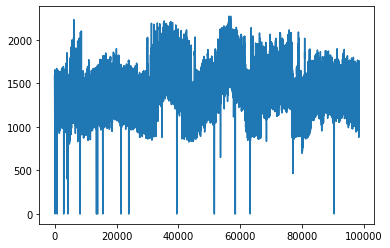

In [91]:
plt.plot(serie_tiempo)

In [92]:
serie_muestreada=muestrear_serie(10,serie_tiempo)

In [93]:
len(serie_muestreada)

9837

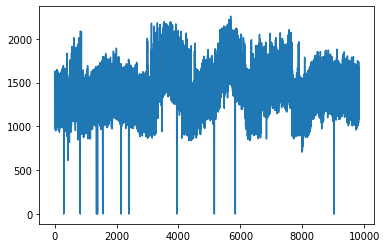

In [94]:
plt.plot(serie_muestreada)


# Serie detiempo household_power_consumption

In [95]:
df=pd.read_csv('household_power_consumption.txt', delimiter=';')
df = df.dropna()
print('Number of rows and columns:', df.shape)
df.head(5)


Number of rows and columns: (2049280, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


# Variable que nos interesa

In [96]:
def obtener_Global_active_power(df):
    
    df_array=np.array(df)
    ft_traspuesto=df_array.transpose()
    Global_active_power=(ft_traspuesto[2])
    dataset = Global_active_power.astype('float32')
    return dataset

In [97]:
Global_active_power=(obtener_Global_active_power(df))

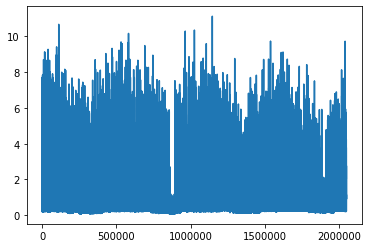

In [83]:
plt.plot(Global_active_power)

Serie de tiempo muestreada cada hora

In [98]:
serie_muestreada_Global_active_power=muestrear_serie(6,Global_active_power)

In [99]:
len(serie_muestreada_Global_active_power)

341547

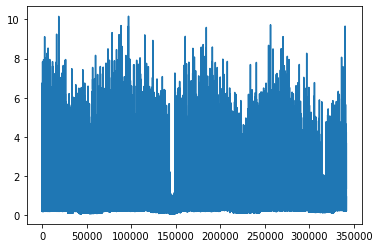

In [100]:
plt.plot(serie_muestreada_Global_active_power)